In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

data_transactions = pd.read_pickle("./transactions_classified_ligera_StemmingSVM.pkl")

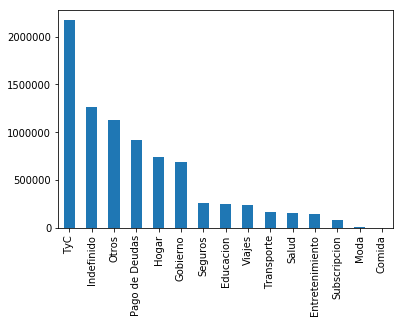

In [2]:
data_transactions.clasificacion.value_counts().plot(kind='bar')

In [3]:
data_transactions = data_transactions.drop(["hora", "ref"],axis=1)
data_transactions["clasificacion"] = data_transactions["clasificacion"].replace({"Indefinido":np.nan})
data_transactions = data_transactions.dropna()

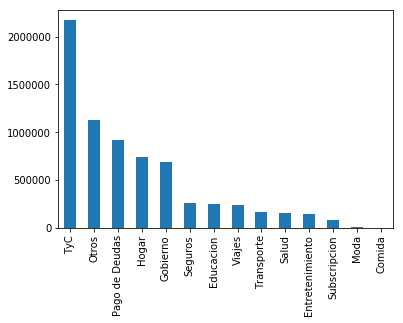

In [4]:
data_transactions.clasificacion.value_counts().plot(kind='bar')

In [5]:
data_transactions["ano"] = data_transactions["fecha"].map(lambda x: x.year)
data_transactions["mes"] = data_transactions["fecha"].map(lambda x: x.month)

In [6]:
meses = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 
   3, 4, 5, 6, 7, 8];
ano = [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 
   2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 
   2018, 2018, 2018];

list_associations = []
for i in range(len(meses)): 
    df = data_transactions.loc[data_transactions["mes"] == meses[i]]
    df = df.loc[df["ano"] == ano[i]]
    users = df.id_cliente.unique()
    df_clients = df.groupby("id_cliente")
    for user in users:
        list_associations.append(df_clients.get_group(user).clasificacion.unique()) 
    #df[["clasificacion", "id_cliente"]].to_csv("Grafo" + str(meses[i])+"-"+str(ano[i])+ ".csv")

In [7]:
list_associations = [list(list_associations[i]) for i in range(len(list_associations))]

In [101]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(list_associations).transform(list_associations)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Comida,Educacion,Entretenimiento,Gobierno,Hogar,Moda,Otros,Pago de Deudas,Salud,Seguros,Subscripcion,Transporte,TyC,Viajes
0,False,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,False,False,True,True
6,False,False,False,False,True,False,True,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,True,False,False,False,False,False,False
9,False,False,False,True,False,False,True,False,False,False,False,False,False,False


In [105]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.05)

,support,itemsets
0,0.063612,(1)
1,0.128404,(3)
2,0.190764,(4)
3,0.254373,(6)
4,0.230447,(7)
5,0.062152,(9)
6,0.497816,(12)
7,0.058871,(13)
8,0.063855,"(4, 6)"
9,0.081336,"(4, 12)"


In [107]:
apriori(df, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.063612,(Educacion)
1,0.128404,(Gobierno)
2,0.190764,(Hogar)
3,0.254373,(Otros)
4,0.230447,(Pago de Deudas)
5,0.062152,(Seguros)
6,0.497816,(TyC)
7,0.058871,(Viajes)
8,0.063855,"(Otros, Hogar)"
9,0.081336,"(TyC, Hogar)"


In [135]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.063612,(Educacion),1
1,0.039870,(Entretenimiento),1
2,0.128404,(Gobierno),1
3,0.190764,(Hogar),1
4,0.254373,(Otros),1
5,0.230447,(Pago de Deudas),1
6,0.045244,(Salud),1
7,0.062152,(Seguros),1
8,0.020490,(Subscripcion),1
9,0.044795,(Transporte),1


In [128]:
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
26,0.063855,"(Otros, Hogar)",2
31,0.081336,"(TyC, Hogar)",2
33,0.050229,"(Otros, Pago de Deudas)",2
37,0.097375,"(TyC, Otros)",2
42,0.095879,"(TyC, Pago de Deudas)",2


In [137]:
from mlxtend.frequent_patterns import association_rules
ass = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
ass.loc[ass["lift"]>1.25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,"(Gobierno, Hogar)",(Otros),0.018582,0.254373,0.007247,0.390024,1.533274,0.002521,1.222387
19,"(Gobierno, Otros)",(Hogar),0.024209,0.190764,0.007247,0.299371,1.569326,0.002629,1.155013
29,"(TyC, Otros)",(Hogar),0.097375,0.190764,0.029431,0.302241,1.584368,0.010855,1.159763
31,"(TyC, Hogar)",(Otros),0.081336,0.254373,0.029431,0.361840,1.422478,0.008741,1.168401
32,(Otros),"(TyC, Hogar)",0.254373,0.081336,0.029431,0.115698,1.422478,0.008741,1.038858
33,(Hogar),"(TyC, Otros)",0.190764,0.097375,0.029431,0.154277,1.584368,0.010855,1.067283
38,(Salud),"(TyC, Pago de Deudas)",0.045244,0.095879,0.005831,0.128886,1.344254,0.001493,1.037890
42,(Otros),(Hogar),0.254373,0.190764,0.063855,0.251028,1.315906,0.015329,1.080462
43,(Hogar),(Otros),0.190764,0.254373,0.063855,0.334731,1.315906,0.015329,1.120790
51,"(Otros, Seguros)",(Hogar),0.014195,0.190764,0.005297,0.373133,1.955990,0.002589,1.290921


## a = [("Pago de Deudas" in element) for element in list_associations]
ab = [("Pago de Deudas" in element) & ("TyC" in element)  for element in list_associations]
b =  [("TyC" in element) for element in list_associations]

In [84]:
ab.count(True)/len(list_associations)/a.count(True)/len(list_associations)

5.737605105171395e-14

In [89]:
(ab.count(True)/len(list_associations))/(a.count(True)/len(list_associations))

0.4160587470329171

In [91]:
(ab.count(True)/len(list_associations))/(a.count(True)/len(list_associations))/(b.count(True)/len(list_associations))

0.8357683273784159